## Importing Libraries

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

## Reading Data

In [220]:
# Data taken from https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020?select=IPL+Matches+2008-2020.csv
df = pd.read_csv("C:/Users/nikhi/Downloads/IPL Matches 2008-2020.csv")
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [221]:
nan_mask = df['method'].isna()
df.loc[nan_mask, 'method'] = 'Normal'

In [222]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Normal,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Normal,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Normal,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,Normal,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,Normal,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,Normal,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,Normal,PR Reiffel,S Ravi


In [223]:
# pd.set_option('display.max_rows', None)
# df_nan = df.dropna()
# df_nan

In [224]:
# df

In [225]:
# nan_rows = df[df.isna().any(axis=1)]

# # Display the rows with NaN values
# print("Rows with NaN values:")
# print(nan_rows)

In [226]:
df.loc[df['result'] == 'tie', 'result_margin'] = 0

In [227]:
df["team1"] = df["team1"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df["team2"] = df["team2"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df["toss_winner"] = df["toss_winner"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df["winner"] = df["winner"].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [228]:
#df.dropna()

In [229]:
#pd.reset_option('display.max_rows')
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Normal,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Normal,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Normal,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.0,Y,Normal,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,Normal,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,Normal,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,Normal,PR Reiffel,S Ravi


## Team Performance Analysis

### Calculating Win Loss Ratio for each team

In [230]:
team_wins = df["winner"].value_counts()
team_losses = df["team1"].value_counts() + df["team2"].value_counts() - team_wins
win_loss_ratio = team_wins / team_losses

In [231]:
win_loss_ratio = win_loss_ratio.sort_values(ascending=False)

In [232]:
print("Win-Loss Ratio (Sorted by Value):")
print(win_loss_ratio)

Win-Loss Ratio (Sorted by Value):
Chennai Super Kings            1.472222
Mumbai Indians                 1.445783
Delhi Capitals                 1.357143
Sunrisers Hyderabad            1.137931
Kolkata Knight Riders          1.064516
Rajasthan Royals               1.012500
Rising Pune Supergiants        1.000000
Royal Challengers Bangalore    0.875000
Kings XI Punjab                0.862745
Gujarat Lions                  0.764706
Kochi Tuskers Kerala           0.750000
Delhi Daredevils               0.712766
Deccan Chargers                0.630435
Pune Warriors                  0.352941
dtype: float64


### Analyzing team performance in different stadiums

In [233]:
team_venue_performance = df.groupby(["team1", "venue", "city"])["winner"].apply(lambda x: x.value_counts().index[0])

In [234]:
#pd.reset_option('display.max_rows', None)
team_venue_performance

team1                venue                                                city         
Chennai Super Kings  Brabourne Stadium                                    Mumbai             Chennai Super Kings
                     Buffalo Park                                         East London        Chennai Super Kings
                     De Beers Diamond Oval                                Kimberley          Chennai Super Kings
                     Dr DY Patil Sports Academy                           Mumbai             Chennai Super Kings
                     Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium  Visakhapatnam      Chennai Super Kings
                                                                                                   ...          
Sunrisers Hyderabad  Feroz Shah Kotla                                     Delhi              Sunrisers Hyderabad
                     M Chinnaswamy Stadium                                Bangalore        Kolkata Knight Riders
        

In [235]:
#type(team_venue_performance)
team_venue_performance = team_venue_performance.reset_index()


In [236]:
team_name = "Mumbai Indians"
MI_performance = team_venue_performance[team_venue_performance["team1"] == team_name]

In [237]:
MI_performance

,team1,venue,city,winner
79,Mumbai Indians,Brabourne Stadium,Mumbai,Mumbai Indians
80,Mumbai Indians,Dr DY Patil Sports Academy,Mumbai,Mumbai Indians
81,Mumbai Indians,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Visakhapatnam,Sunrisers Hyderabad
82,Mumbai Indians,Dubai International Cricket Stadium,Dubai,Kings XI Punjab
83,Mumbai Indians,Eden Gardens,Kolkata,Mumbai Indians
84,Mumbai Indians,Kingsmead,Durban,Rajasthan Royals
85,Mumbai Indians,M Chinnaswamy Stadium,Bangalore,Mumbai Indians
86,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Chennai,Mumbai Indians
87,Mumbai Indians,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,Mumbai Indians
88,Mumbai Indians,Sharjah Cricket Stadium,Sharjah,Sunrisers Hyderabad


### Determining the most successful teams based on wins or winning percentage

In [238]:
team_wins = df["winner"].value_counts()
team_winning_percentage = team_wins / len(df) * 100

In [239]:
team_winning_percentage

Mumbai Indians                 14.705882
Chennai Super Kings            12.990196
Kolkata Knight Riders          12.132353
Royal Challengers Bangalore    11.151961
Kings XI Punjab                10.784314
Rajasthan Royals                9.926471
Delhi Daredevils                8.210784
Sunrisers Hyderabad             8.088235
Deccan Chargers                 3.553922
Delhi Capitals                  2.328431
Rising Pune Supergiants         1.838235
Gujarat Lions                   1.593137
Pune Warriors                   1.470588
Kochi Tuskers Kerala            0.735294
Name: winner, dtype: float64

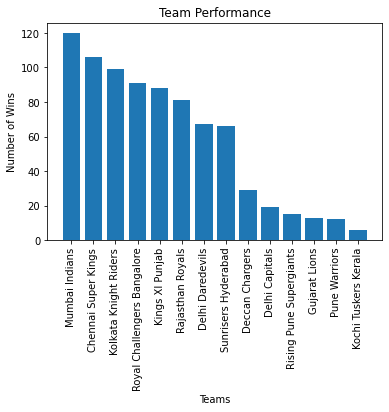

In [240]:
teams = df['team1'].unique()  # Replace with the actual column name for teams in your DataFrame
win_counts = df['winner'].value_counts()  # Replace with the actual column name for winners in your DataFrame

# Bar chart for team performance
plt.bar(win_counts.index, win_counts.values)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Team Performance')
plt.xticks(rotation=90)
plt.show()

### Identifying trends or patterns in team performance over time

In [241]:
df["date"] = pd.to_datetime(df["date"])  # Convert the date column to datetime format
df["year"] = df["date"].dt.year
team_performance_over_time = df.groupby(["team1", "year"])["winner"].count()

In [242]:
team_performance_over_time

team1                year
Chennai Super Kings  2008     9
                     2009    11
                     2010     9
                     2011     8
                     2012     9
                             ..
Sunrisers Hyderabad  2016     8
                     2017     8
                     2018     8
                     2019     7
                     2020     6
Name: winner, Length: 107, dtype: int64

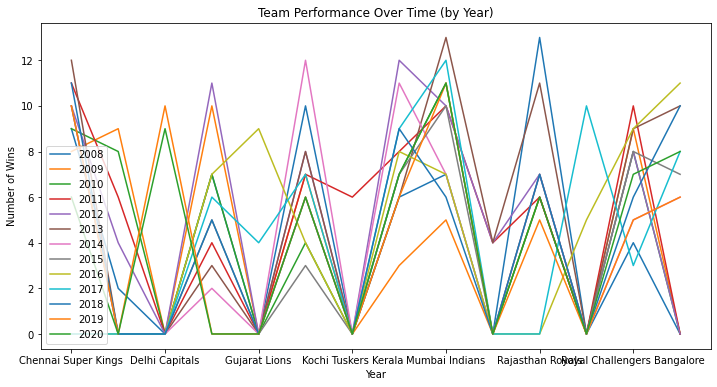

In [243]:
# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract the year from the "date" column
df["year"] = df["date"].dt.year

# Group matches by team and year to calculate the number of wins per year
team_performance_over_time = df.groupby(["winner", "year"]).size().unstack(fill_value=0)

# Plot the performance of each team over time (by year)
team_performance_over_time.plot(kind='line', figsize=(12, 6))

# Set the plot title and axis labels
plt.title("Team Performance Over Time (by Year)")
plt.xlabel("Year")
plt.ylabel("Number of Wins")

# Add a legend
plt.legend(loc="best")

# Display the plot
plt.show()

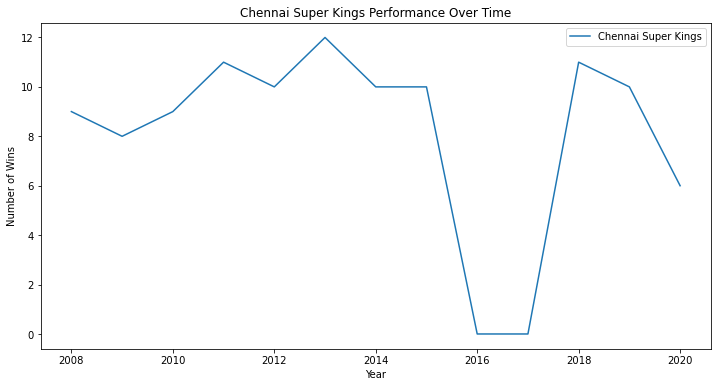

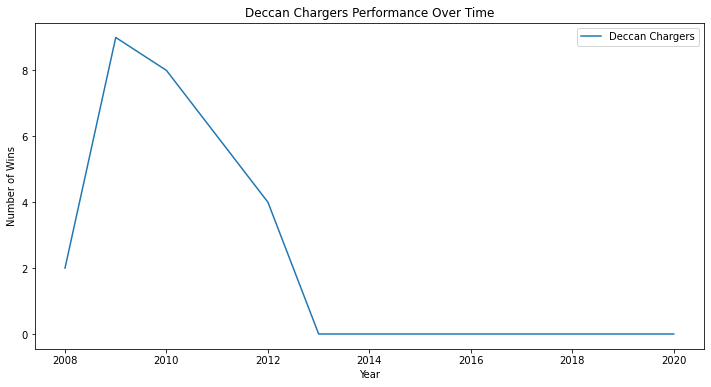

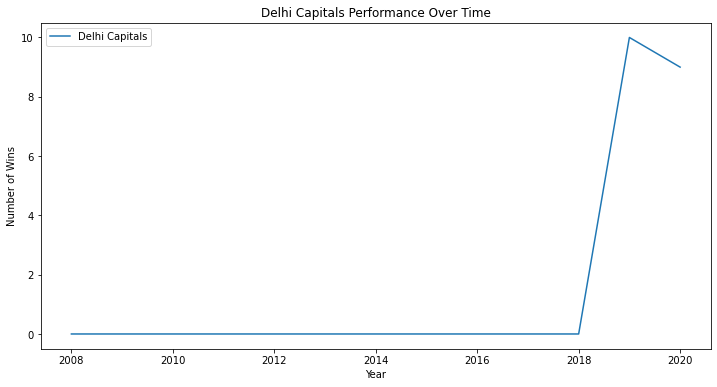

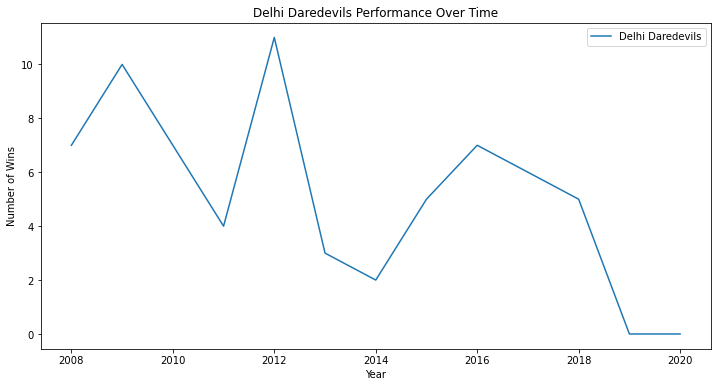

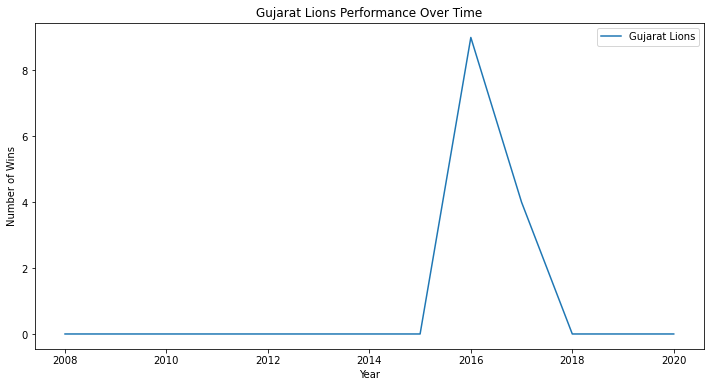

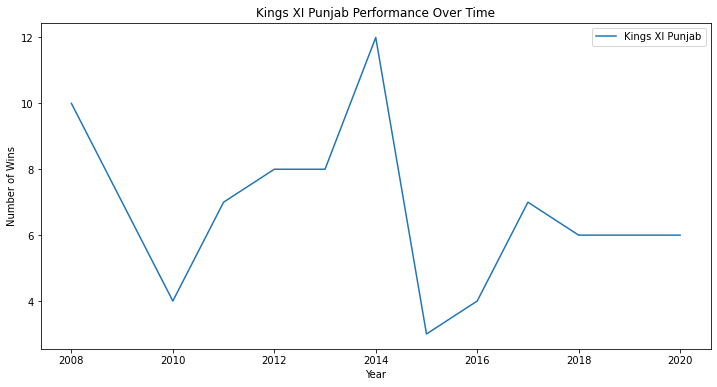

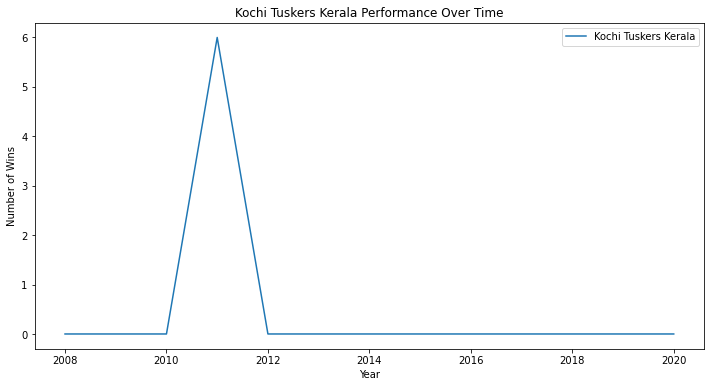

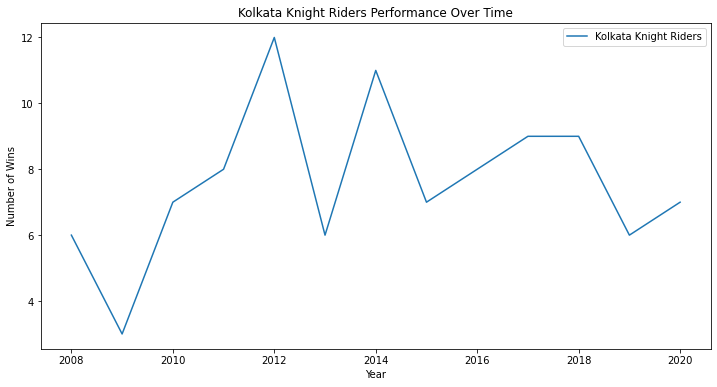

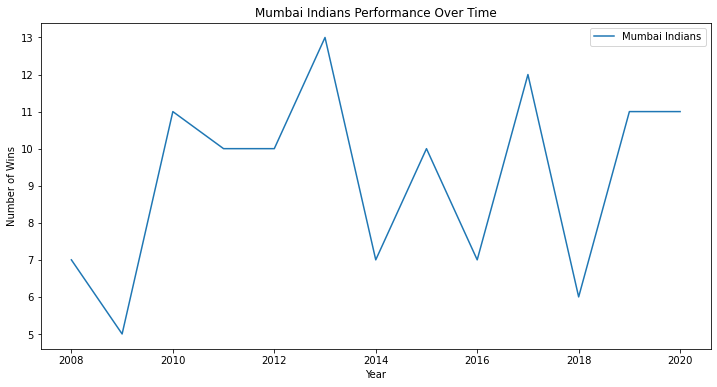

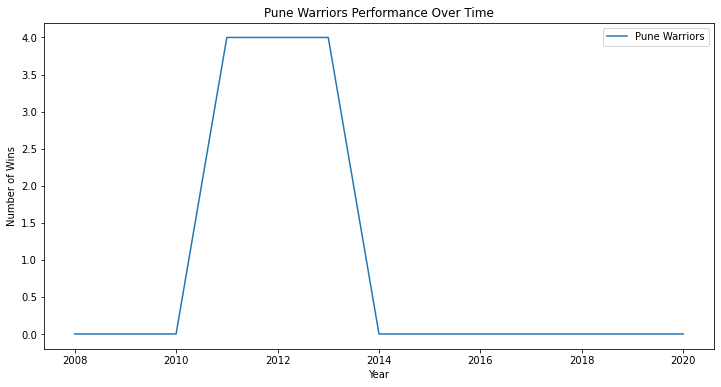

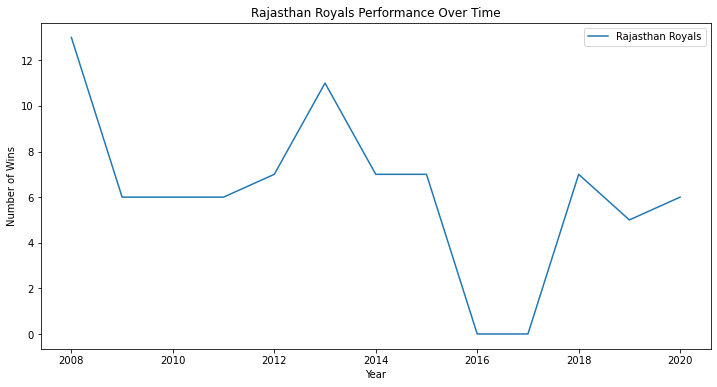

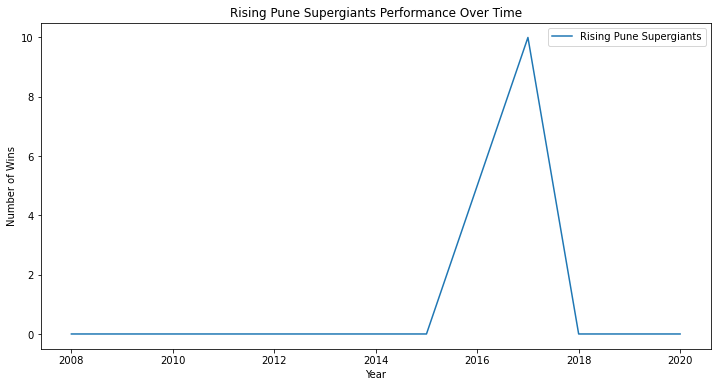

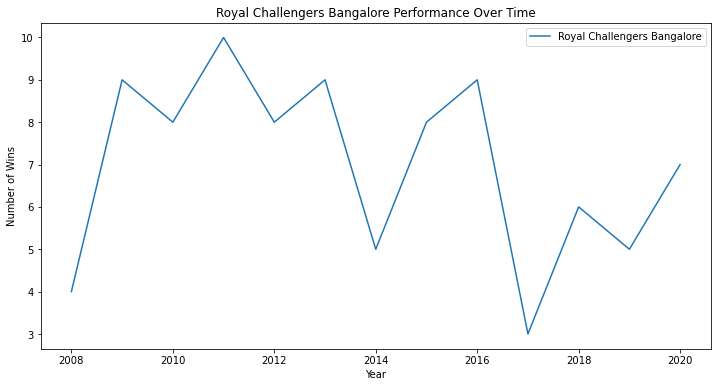

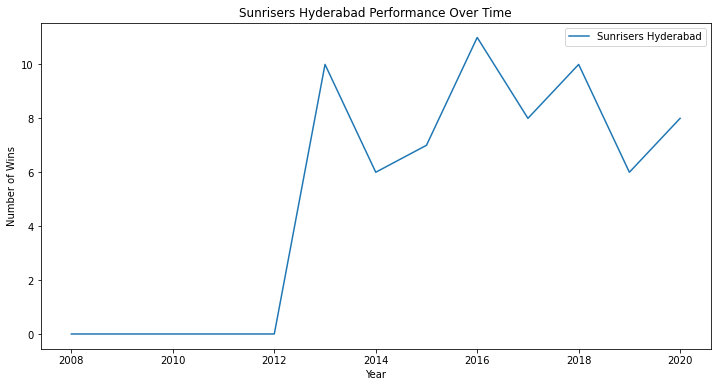

In [244]:
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year

team_performance_over_time = df.groupby(["winner", "year"]).size().unstack(fill_value=0)

teams = team_performance_over_time.index

for team in teams:
    
    team_data = team_performance_over_time.loc[team]
    
    plt.figure(figsize=(12, 6))
    plt.plot(team_data.index, team_data.values, label=team)
    
    plt.title(f"{team} Performance Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Wins")
    
    plt.legend(loc="best")
    
    plt.show()


## Player Performance Analysis

### Determining the most consistent or impactful players based on the number of "Player of the Match" awards

In [245]:
player_awards = df['player_of_match'].value_counts()
most_consistent_players = player_awards.sort_values(ascending=False)

In [246]:
#pd.reset_option('display.max_rows', None)
most_consistent_players

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
DL Chahar          1
HF Gurney          1
K Rabada           1
CR Brathwaite      1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

### Ploting the performance of the top 10 most consistent players over the years

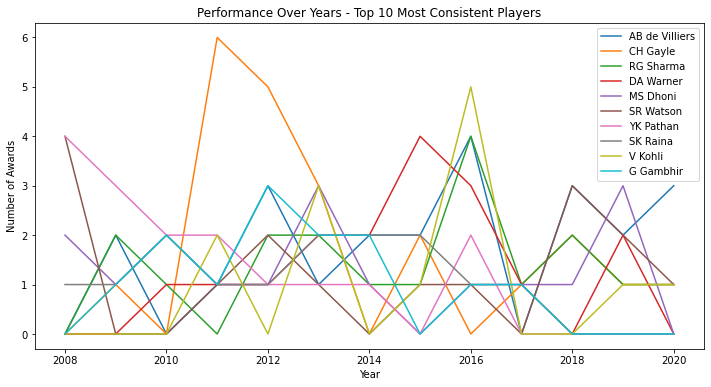

In [247]:
top_10_players = most_consistent_players.head(10)

player_performance_over_years = df[df['player_of_match'].isin(top_10_players.index)]

player_performance_over_years = player_performance_over_years.groupby(['player_of_match', 'year']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

for player in top_10_players.index:
    plt.plot(player_performance_over_years.loc[player], label=player)

plt.title("Performance Over Years - Top 10 Most Consistent Players")
plt.xlabel("Year")
plt.ylabel("Number of Awards")

plt.legend(loc="best")

plt.show()


### Analyzing the performance of players against specific teams

In [248]:
# team_names = df['team1'].unique()

# for team_name in team_names:
    
#     team_performance = df[(df['team1'] == team_name) | (df['team2'] == team_name)]

#     player_team_awards = team_performance[team_performance['player_of_match'].notnull()]['player_of_match'].value_counts()

#     player_performance_against_team = player_team_awards.sort_values(ascending=False)

#     print(f"Player Performance against {team_name}:")
#     print(player_performance_against_team)
#     print()


## Toss Analysis

### Analyzing the correlation between winning the toss and winning the match

In [249]:
total_matches = len(df)

matches_won_toss = df[df['toss_winner'] == df['winner']]
correlation = len(matches_won_toss) / total_matches

In [250]:
correlation

0.5122549019607843

In [251]:
# Correlation between winning the toss and winning the match for each team
team_correlations = {}

teams = df['toss_winner'].unique()

for team in teams:
    
    team_performance = df[df['toss_winner'] == team]
    
    total_matches = len(team_performance)
    
    matches_won_toss = team_performance[team_performance['winner'] == team]
    toss_won_matches = len(matches_won_toss)
    
    correlation = toss_won_matches / total_matches
    
    team_correlations[team] = correlation

correlation_series = pd.Series(team_correlations)

correlation_series = correlation_series.sort_values(ascending=False)

print("Correlation between winning the toss and winning the match for each team:")
print(correlation_series)


Correlation between winning the toss and winning the match for each team:
Gujarat Lions                  0.666667
Chennai Super Kings            0.628866
Rising Pune Supergiants        0.615385
Mumbai Indians                 0.575472
Kolkata Knight Riders          0.561224
Sunrisers Hyderabad            0.508772
Rajasthan Royals               0.505747
Kochi Tuskers Kerala           0.500000
Delhi Capitals                 0.500000
Royal Challengers Bangalore    0.494253
Deccan Chargers                0.441860
Delhi Daredevils               0.437500
Kings XI Punjab                0.423529
Pune Warriors                  0.150000
dtype: float64


### Determining the most preferred toss decision and its impact on the match outcome

In [252]:
toss_decisions = df['toss_decision'].value_counts()

most_preferred_decision = toss_decisions.idxmax()
print(f"Most preferred toss decision: {most_preferred_decision}")

preferred_decision_matches = df[df['toss_decision'] == most_preferred_decision]

matches_won_preferred_decision = preferred_decision_matches[preferred_decision_matches['toss_winner'] == preferred_decision_matches['winner']]

impact = len(matches_won_preferred_decision) / len(preferred_decision_matches)

print(f"Impact of the preferred toss decision on the match outcome: {impact}")


Most preferred toss decision: field
Impact of the preferred toss decision on the match outcome: 0.5504032258064516


In [253]:
# For each team

teams = df['toss_winner'].unique()

for team in teams:
    
    team_performance = df[df['toss_winner'] == team]

    toss_decisions = team_performance['toss_decision'].value_counts()
    
    most_preferred_decision = toss_decisions.idxmax()
    print(f"\nMost preferred toss decision for {team}: {most_preferred_decision}")
    
    preferred_decision_matches = team_performance[team_performance['toss_decision'] == most_preferred_decision]
    
    matches_won_preferred_decision = preferred_decision_matches[preferred_decision_matches['toss_winner'] == preferred_decision_matches['winner']]
    
    impact = len(matches_won_preferred_decision) / len(preferred_decision_matches)
    
    print(f"Impact of the preferred toss decision on the match outcome for {team}: {impact}")



Most preferred toss decision for Royal Challengers Bangalore: field
Impact of the preferred toss decision on the match outcome for Royal Challengers Bangalore: 0.5079365079365079

Most preferred toss decision for Chennai Super Kings: bat
Impact of the preferred toss decision on the match outcome for Chennai Super Kings: 0.6078431372549019

Most preferred toss decision for Rajasthan Royals: field
Impact of the preferred toss decision on the match outcome for Rajasthan Royals: 0.5471698113207547

Most preferred toss decision for Mumbai Indians: field
Impact of the preferred toss decision on the match outcome for Mumbai Indians: 0.5862068965517241

Most preferred toss decision for Deccan Chargers: bat
Impact of the preferred toss decision on the match outcome for Deccan Chargers: 0.4583333333333333

Most preferred toss decision for Kings XI Punjab: field
Impact of the preferred toss decision on the match outcome for Kings XI Punjab: 0.5172413793103449

Most preferred toss decision for Ko

### Identifying teams with a higher success rate after winning the toss

In [254]:
import pandas as pd

matches_won_toss = df[df['toss_winner'] == df['winner']]['toss_winner'].value_counts()

matches_won_toss_count = df['toss_winner'].value_counts()

success_rate = (matches_won_toss / matches_won_toss_count) * 100

sorted_teams = success_rate.sort_values(ascending=False)

print("Teams with a higher success rate after winning the toss (in percentage):")
print(sorted_teams)

Teams with a higher success rate after winning the toss (in percentage):
Gujarat Lions                  66.666667
Chennai Super Kings            62.886598
Rising Pune Supergiants        61.538462
Mumbai Indians                 57.547170
Kolkata Knight Riders          56.122449
Sunrisers Hyderabad            50.877193
Rajasthan Royals               50.574713
Delhi Capitals                 50.000000
Kochi Tuskers Kerala           50.000000
Royal Challengers Bangalore    49.425287
Deccan Chargers                44.186047
Delhi Daredevils               43.750000
Kings XI Punjab                42.352941
Pune Warriors                  15.000000
Name: toss_winner, dtype: float64


## Match Result Analysis

### Analyzing the distribution of match results

Distribution of match results:
wickets    435
runs       364
tie         13
Name: result, dtype: int64


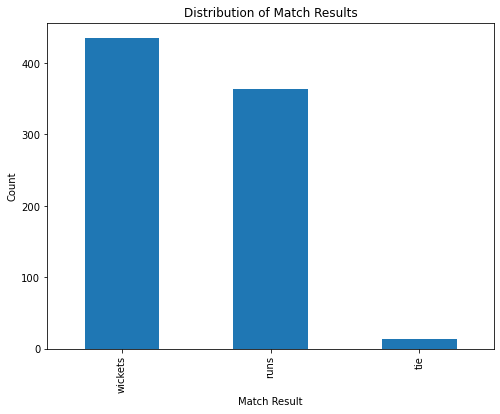

In [255]:
result_distribution = df['result'].value_counts()
print("Distribution of match results:")
print(result_distribution)

# Visualize the distribution of match results
plt.figure(figsize=(8, 6))
result_distribution.plot(kind='bar')
plt.title("Distribution of Match Results")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.show()

### The impact of different match conditions on the match result

In [256]:
toss_decision_result = df.groupby(['toss_decision', 'result']).size().unstack()
print("Impact of Toss Decision on Match Result:")
print(toss_decision_result)

Impact of Toss Decision on Match Result:
result         runs  tie  wickets
toss_decision                    
bat             146    5      168
field           218    8      267


<Figure size 576x432 with 0 Axes>

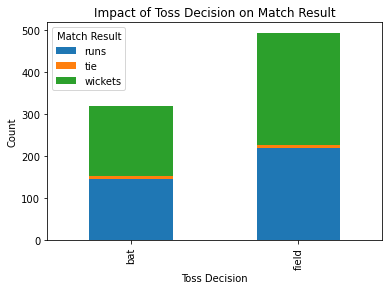

In [257]:
plt.figure(figsize=(8, 6))
toss_decision_result.plot(kind='bar', stacked=True)
plt.title("Impact of Toss Decision on Match Result")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.legend(title="Match Result")
plt.show()

## Venue Analysis


In [258]:
all_teams = df['team1'].unique()

team_dropdown = widgets.Dropdown(options=all_teams, description='Team: ')
venue_output = widgets.Output()



# Function to update the venue information based on the selected team
def update_venue_info(team):
    team_matches = df[(df['team1'] == team) | (df['team2'] == team)]

    matches_played_by_venue = team_matches.groupby('venue').size()

    matches_won = team_matches[team_matches['winner'] == team]

    matches_won_by_venue = matches_won.groupby('venue').size()

    venue_output.clear_output()

    with venue_output:
        print(f"Team: {team}")
        for venue in matches_played_by_venue.index:
            num_matches_played = matches_played_by_venue[venue]
            num_matches_won = matches_won_by_venue.get(venue, 0)  # Get the count of matches won at the venue, or 0 if not available
            print(f"Venue: {venue}")
            print(f"Matches Played: {num_matches_played}")
            print(f"Matches Won: {num_matches_won}")
            print()

team_dropdown.observe(lambda change: update_venue_info(change.new), names='value')

display(team_dropdown, venue_output)


Dropdown(description='Team: ', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', …

Output()

In [259]:
all_teams = df['team1'].unique()

team_dropdown = widgets.Dropdown(options=all_teams, description='Team: ')
venue_output = widgets.Output()

def update_venue_info(team):
    # Filter the dataset for the team's matches
    team_matches = df[(df['team1'] == team) | (df['team2'] == team)]

    venue_win_percentage = team_matches.groupby('venue')['winner'].apply(lambda x: len(x[x == team]) / len(x) * 100)

    venue_output.clear_output()

    with venue_output:
        print(f"Team: {team}")
        for venue, win_percentage in venue_win_percentage.items():
            print(f"Venue: {venue}")
            print(f"Win Percentage: {win_percentage:.2f}%")
            print()

team_dropdown.observe(lambda change: update_venue_info(change.new), names='value')

display(team_dropdown, venue_output)


Dropdown(description='Team: ', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', …

Output()

In [260]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

df.dropna(inplace=True)

city               13
player_of_match     4
winner              4
result              4
result_margin       4
eliminator          4
dtype: int64


In [261]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [262]:
features = ['team1', 'team2', 'toss_winner', 'venue', 'toss_decision']
target = 'winner'

X = df[features]
y = df[target]

X_encoded = pd.get_dummies(X)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the match outcome for new data
team1 = 'Mumbai Indians' 
team2 = 'Chennai Super Kings'  
toss_winner = 'Mumbai Indians'  
venue = 'Wankhede Stadium'  
toss_decision = 'bat'  

new_data = pd.DataFrame({
    'team1': [team1],
    'team2': [team2],
    'toss_winner': [toss_winner],
    'venue': [venue],
    'toss_decision': [toss_decision]
})

# Encode the new data using the same one-hot encoding process
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Handle missing values in the new data with mean imputation
new_data_imputed = imputer.transform(new_data_encoded)

predicted_winner = model.predict(new_data_imputed)

print(f"Predicted Winner: {predicted_winner[0]}")

Predicted Winner: Mumbai Indians


In [263]:
team1 = 'Mumbai Indians' 
team2 = 'Chennai Super Kings'  
toss_winner = 'Chennai Super Kings' 
venue = 'Wankhede Stadium'  
toss_decision = 'bat'  

new_data = pd.DataFrame({
    'team1': [team1],
    'team2': [team2],
    'toss_winner': [toss_winner],
    'venue': [venue],
    'toss_decision': [toss_decision]
})

new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

new_data_imputed = imputer.transform(new_data_encoded)

predicted_winner = model.predict(new_data_imputed)

print(f"Predicted Winner: {predicted_winner[0]}")

Predicted Winner: Mumbai Indians


In [264]:
team1 = 'Mumbai Indians' 
team2 = 'Chennai Super Kings' 
toss_winner = 'Mumbai Indians' 
venue = 'MA Chidambaram Stadium, Chepauk'  
toss_decision = 'field'  

# Create a dataframe with the input data
new_data = pd.DataFrame({
    'team1': [team1],
    'team2': [team2],
    'toss_winner': [toss_winner],
    'venue': [venue],
    'toss_decision': [toss_decision]
})

new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

new_data_imputed = imputer.transform(new_data_encoded)

predicted_winner = model.predict(new_data_imputed)

print(f"Predicted Winner: {predicted_winner[0]}")

Predicted Winner: Mumbai Indians


In [265]:
team1 = 'Delhi Daredevils' 
team2 = 'Royal Challengers Bangalore' 
toss_winner = 'Delhi Daredevils' 
venue = 'Wankhede Stadium'  
toss_decision = 'field'  

# Create a dataframe with the input data
new_data = pd.DataFrame({
    'team1': [team1],
    'team2': [team2],
    'toss_winner': [toss_winner],
    'venue': [venue],
    'toss_decision': [toss_decision]
})

new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

new_data_imputed = imputer.transform(new_data_encoded)

predicted_winner = model.predict(new_data_imputed)

print(f"Predicted Winner: {predicted_winner[0]}")

Predicted Winner: Royal Challengers Bangalore
